In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Expectation-Maximization


### Definitions

Let $\mathcal{X}=(\textbf{x}_1, \textbf{x}_2, ..., \textbf{x}_n)$ be a sample ($\textbf{x}_i\in \mathbb{R}^d$) of $n$ i.i.d. observations from a mixture of two distinct $d$-dimensional multivariate Gaussian distributions. Let $\mathcal{Y} = (y_1, y_2, ..., y_n)$ be the set of group labels, that is $y\in\{1,2\}$ which indicate from which Gaussian mixture each observation $\textbf{x}_i$ was truly sampled from. The set $\mathcal{Y}$ is sometimes called "latent" indicating that the gourp labels $y_i$ are unknown beforehand. That is, we do not know into which Gaussians the samples belong to. Furthermore, we define $\boldsymbol\theta = (\boldsymbol\tau, \boldsymbol\mu_1, \boldsymbol\mu_2, \boldsymbol\Sigma_1, \boldsymbol\Sigma_2)$ to be a set of parameters which fully describe the distributions of the data. The parameters $\boldsymbol\tau = (\tau_1, \tau_2)$ are the "mixing parameters" with $\tau_1+\tau_2 = 1$ which determine the weights of "how much" each sample $\textbf{x}_i$ came from either Gaussian. We treat these "mixing values" as the prior probabilities that a given sample $\textbf{x}_i$ "belongs" to either Gaussian 1 or Gaussian 2. Explicitly put, we state this as $P(y_i=1|\boldsymbol\theta)=\tau_1$ and $P(y_2=1|\boldsymbol\theta)=\tau_2=1-\tau_1$.

If sample $\textbf{x}_i$ was generated by Gaussian 1, then $\textbf{x}_i \sim \mathcal{N}(\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1)$ and if it was generated by Gaussian 2, then $\textbf{x}_i \sim \mathcal{N}(\boldsymbol{\mu}_2, \boldsymbol{\Sigma}_2)$. Explicitly put: 

$$p(\textbf{x}_i|y_i=1, \boldsymbol\theta)=\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_1|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_1)^T\boldsymbol\Sigma^{-1}_1(\textbf{x}_i-\boldsymbol\mu_1)\right),\;\;\;\text{if $\textbf{x}_i$ is known to be generated by Gaussian 1}$$

$$p(\textbf{x}_i|y_i=2, \boldsymbol\theta)=\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_2|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_2)^T\boldsymbol\Sigma^{-1}_2(\textbf{x}_i-\boldsymbol\mu_2)\right),\;\;\;\text{if $\textbf{x}_i$ is known to be generated by Gaussian 2}.$$


If $\textbf{x}_i$ is generated by the mixture of these two Gaussians, then the probability density of $\textbf{x}_i$ is: 

$$p(\textbf{x}_i|\boldsymbol\theta) = \sum_{j=1}^2 p(\textbf{x}_i, y_i=j|\boldsymbol\theta) = \sum_{j=1}^2 P(y_i=j|\boldsymbol\theta)\,p(\textbf{x}_i|y_i=j, \boldsymbol\theta)=\tau_1 \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_1|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_1)^T\boldsymbol\Sigma^{-1}_1(\textbf{x}_i-\boldsymbol\mu_1)\right) + \tau_2 \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_2|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_2)^T\boldsymbol\Sigma^{-1}_2(\textbf{x}_i-\boldsymbol\mu_2)\right),$$

 If we integrate the mixture density of $\textbf{x}_i$:

$$\int_{-\infty}^{\infty} p(\textbf{x}_i|\boldsymbol\theta)\,d\textbf{x} = \int_{-\infty}^{\infty}\sum_{j=1}^2 P(y_i=j|\boldsymbol\theta)\,p(\textbf{x}_i|y_i=j, \boldsymbol\theta)\,d\textbf{x}= \tau_1 \underbrace{\int_{-\infty}^{\infty} p(\textbf{x}_i|y_i=1, \boldsymbol\theta)\,d\textbf{x}}_{= 1} + \tau_2 \underbrace{\int_{-\infty}^{\infty} p(\textbf{x}_i|y_i=2, \boldsymbol\theta)\,d\textbf{x}}_{= 1} = \tau_1 + \tau_2 = 1$$

as it should. 

### Incomplete data likelihood

Let us first define the "incomplete" data likelihood (with symbol $L$ as likelihood, since it's not the same as probability): 

$$L(\mathcal{X}|\boldsymbol\theta)=L(\textbf{x}_1, \textbf{x}_2, ..., \textbf{x}_n|\boldsymbol\theta) = \prod_{i=1}^n p(\textbf{x}_i|\boldsymbol\theta) = \prod_{i=1}^n \sum_{j=1}^2 P(y_i=j|\boldsymbol\theta) \, p(\textbf{x}_i|y_i=j, \boldsymbol\theta) = \prod_{i=1}^n \sum_{j=1}^2 \tau_j \, p(\textbf{x}_i|y_i=j, \boldsymbol\theta),$$

This "incomplete data likelihood" means the likelihood of observing the data set $\mathcal{X}$ prior to not having any information about the labels in $\mathcal{Y}$ assuming that both Gaussians contribute in the generation of the samples. 

### Complete data likelihood 

The "complete data likelihood" is the likelihood of observing the pair $(\mathcal{X}, \mathcal{Y})$ from the Gaussian mixture. In this case, since the set $\mathcal{Y}$ is given we know for sure that either Gaussian 1 or Gaussian 2 completely generated a given sample $\textbf{x}_i$. Thus we can write the complete data likelihood as:   

$$L(\mathcal{X}, \mathcal{Y}|\boldsymbol\theta)=L(\textbf{x}_1, \textbf{x}_2, ..., \textbf{x}_n, y_1, y_2, ..., y_n|\boldsymbol\theta) = \prod_{i=1}^n p(\textbf{x}_i, y_i|\boldsymbol\theta) = \prod_{i=1}^n \sum_{j=1}^2 P(y_i=j|\boldsymbol\theta) \, p(\textbf{x}_i|y_i=j,\boldsymbol\theta)\, \mathbb{I}(y_i=j) = \prod_{i=1}^n \sum_{j=1}^2 \tau_j \, p(\textbf{x}_i|y_i=j,\boldsymbol\theta)\, \mathbb{I}(y_i=j),$$

where $\mathbb{I}(y_i=j)\in\{0,1\}$ is the indicator function. Why is the indicator function added here? Lets take a look at the joint density above, that is $p(\textbf{x}_i, y_i|\boldsymbol\theta)$. What is this function saying? If we did not care from which Gaussian the observation $\textbf{x}_i$ was sampled from, then the density of $\textbf{x}_i$ would be described by $p(\textbf{x}_i|\boldsymbol\theta) = \sum_{j=1}^2 p(\textbf{x}_i, y_i=j|\boldsymbol\theta)$, that is by the combination of the two Gaussians. Now, with the function $p(\textbf{x}_i, y_i|\boldsymbol\theta)$ the density depends on from which Gaussian $\textbf{x}_i$ was generated from. Thus if $y_i=1$, then the "part" of the mixture density belonging to Gaussian 2 had no probabilistic effect on the sampling of $\textbf{x}_i$ and thus only the density caused by Gaussian 1 had a part to play.  

Lets open up the incomplete likelihood more: 

$$L(\mathcal{X}, \mathcal{Y}|\boldsymbol\theta)=\prod_{i=1}^n \sum_{j=1}^2 \tau_j \, p(\textbf{x}_i|y_i=j,\boldsymbol\theta)\, \mathbb{I}(y_i=j) = \prod_{i=1}^n \sum_{j=1}^2 \exp\left(\ln \tau_j\right) \, \exp\left(\ln\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_j|}}\right)\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j)\right)\, \mathbb{I}(y_i=j)$$

$$=\prod_{i=1}^n \sum_{j=1}^2 \exp\left(\ln \tau_j + \ln\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_j|}}-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j) \right)\,\mathbb{I}(y_i=j)$$

At this point, lets take a look at the inner sum:

$$\sum_{j=1}^2 \exp\left(\ln \tau_j + \ln\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_j|}}-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j) \right)\,\mathbb{I}(y_i=j)$$

$$=\exp\left(\ln \tau_1 + \ln\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_1|}}-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_1)^T\boldsymbol\Sigma^{-1}_1(\textbf{x}_i-\boldsymbol\mu_1) \right)\,\mathbb{I}(y_i=1)+\exp\left(\ln \tau_2 + \ln\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_2|}}-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_2)^T\boldsymbol\Sigma^{-1}_2(\textbf{x}_i-\boldsymbol\mu_2) \right)\, \mathbb{I}(y_i=2).$$

Because $\mathbb{I}(y_i=j)$ equals either $0$ or $1$ we know for sure that one of the above terms is always zero. Getting back to the complete likelihood, this is why it is true that: 

$$p(\mathcal{X}, \mathcal{Y}|\boldsymbol\theta)=\prod_{i=1}^n \underbrace{\sum_{j=1}^2 \exp\left(\ln \tau_j + \ln\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_j|}}-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j) \right)\,\mathbb{I}(y_i=j)}_{\text{Only one term in this sum}}=\exp\left(\sum_{i=1}^n \sum_{j=1}^2 \left\{\ln \tau_j + \ln\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_j|}}-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j) \right\}\, \mathbb{I}(y_i=j)\right)\,$$

$$=\exp\left(\sum_{i=1}^n \sum_{j=1}^2 \left\{\ln \tau_j - \frac{d}{2}\ln 2\pi - \frac{1}{2}\ln |\boldsymbol\Sigma_j|-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j) \right\}\, \mathbb{I}(y_i=j)\right),$$

and furthermore, since only one of the functions $\mathbb{I}(y_i=j)$ equals 1 and the rest are zero, we can safely omit the indicator from the equation without affecting the results. Thus: 

$$p(\mathcal{X}, \mathcal{Y}|\boldsymbol\theta)=\exp\left(\sum_{i=1}^n \sum_{j=1}^2 \left\{\ln \tau_j - \frac{d}{2}\ln 2\pi - \frac{1}{2}\ln |\boldsymbol\Sigma_j|-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j) \right\}\right).$$

As a next step, let us look at the density $p(y_i=j|\,\textbf{x}_i, \boldsymbol\theta)$. By applying the Bayes theorem (where distributions can be discrete and continuous) we have that: 

$$p(y_i=j|\,\textbf{x}_i, \boldsymbol\theta) = \frac{p(\textbf{x}_i|\,y_i=j, \boldsymbol\theta)P(y_i=j|\,\boldsymbol\theta)}{p(\textbf{x}_i|\,\boldsymbol\theta)}=\frac{p(\textbf{x}_i|\,y_i=j, \boldsymbol\theta)\,\tau_j}{\sum_{k=1}^2 p(\textbf{x}_i, y_i = k |\, \boldsymbol\theta)}=\frac{p(\textbf{x}_i|\,y_i=j, \boldsymbol\theta)\,\tau_j}{\sum_{k=1}^2 p(\textbf{x}_i|\,y_i=k, \boldsymbol\theta)\,\tau_k} = \frac{\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_j|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j)\right)\,\tau_j}{\sum_{k=1}^2 \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_k|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k)\right)\,\tau_k}$$

### Finding the MLE solution

Next, let us define the function: 

$$Q(\boldsymbol\theta|\boldsymbol\theta^{(t)}) = E_{Y|X,\boldsymbol\theta^{(t)}}\left[\ln p(\mathcal{X}, \mathcal{Y}|\boldsymbol\theta)\right],$$

where $X$ and $Y$ refer to the random variables of $\textbf{x}$ and $y$, and $\boldsymbol\theta^{(t)}$ referes to the parameter set $\boldsymbol\theta$ at (time) step $t$, that is $\boldsymbol\theta^{(t)} = (\boldsymbol\tau^{(t)}, \boldsymbol\mu_1^{(t)}, \boldsymbol\mu_2^{(t)}, \boldsymbol\Sigma_1^{(t)}, \boldsymbol\Sigma_2^{(t)})$. Let us continue with this function:

$$Q(\boldsymbol\theta|\boldsymbol\theta^{(t)}) = E_{Y|X,\boldsymbol\theta^{(t)}}\left[\ln p(\mathcal{X}, \mathcal{Y}|\boldsymbol\theta)\right]=E_{Y|X,\boldsymbol\theta^{(t)}}\left[\ln \prod_{i=1}^n p(\textbf{x}_i, y_i|\boldsymbol\theta)\right]=E_{Y|X,\boldsymbol\theta^{(t)}}\left[ \sum_{i=1}^n \ln p(\textbf{x}_i, y_i|\boldsymbol\theta)\right]= \sum_{i=1}^n E_{Y|X,\boldsymbol\theta^{(t)}}\left[ \ln p(\textbf{x}_i, y_i|\boldsymbol\theta)\right] =\sum_{i=1}^n \sum_{j=1}^2 p(y_i=j|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \ln p(\textbf{x}_i, y_i=j|\boldsymbol\theta).$$

#### The mixing parameters

Let us first find the optimal mixing parameters. To do so, recall that we had the constraint $\tau_1 + \tau_2 = 1$ so we need to use Langrange multipliers and thus our optimization function becomes: 

$$f(\lambda, \boldsymbol\tau) = Q(\boldsymbol\theta|\boldsymbol\theta^{(t)}) + \lambda(\tau_1+\tau_2-1),$$

and thus by taking the derivative, setting to zero, etc.: 

$$\frac{\partial f(\lambda, \boldsymbol\tau)}{\partial \tau_k} = \frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial \tau_k} + \lambda = 0 \Leftrightarrow \lambda = - \frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial \tau_k}.$$

So what is $\frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial \tau_k}$? Lets calculate it: 

$$\frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial \tau_k} = \frac{\partial}{\partial\tau_k}\left(\sum_{i=1}^n \sum_{j=1}^2 p(y_i=j|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \ln p(\textbf{x}_i, y_i=j|\boldsymbol\theta)\right)=\underbrace{\frac{\partial}{\partial\tau_k}\left(\sum_{i=1}^n \sum_{j=1}^2 \color{red}{p(y_i=j|\,\textbf{x}_i, \boldsymbol\theta^{(t)})} \ln p(\textbf{x}_i, y_i=j|\boldsymbol\theta)\right)}_{\text{Notice that $p(y_i=j|\,\textbf{x}_i, \boldsymbol\theta^{(t)})$ is a function of the old $\boldsymbol\theta^{(t)}$ parameters}}= \sum_{i=1}^n \sum_{j=1}^2 p(y_i=j|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial\tau_k}\left( \ln p(\textbf{x}_i, y_i=j|\boldsymbol\theta) \right).$$

Lets look at the partial derivative of the log function: 

$$\frac{\partial}{\partial\tau_k}\left( \ln p(\textbf{x}_i, y_i=j|\boldsymbol\theta) \right) = \frac{\partial}{\partial\tau_k}\left( \ln P(y_i=j|\boldsymbol\theta)\, p(\textbf{x}_i|y_i=j, \boldsymbol\theta) \right) = \frac{\partial}{\partial\tau_k}\left( \ln\left\{ \tau_j \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_j|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j)\right)\right\} \right)$$

$$=\frac{\partial}{\partial\tau_k}\left( \ln\tau_j + \ln\left\{ \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_j|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j)\right)\right\} \right) = \frac{\partial}{\partial\tau_k}(\ln\tau_j) + \underbrace{\frac{\partial}{\partial\tau_k}\left( \ln\left\{ \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_j|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_j)^T\boldsymbol\Sigma^{-1}_j(\textbf{x}_i-\boldsymbol\mu_j)\right)\right\}\right)}_{\text{Does not depend on $\tau_k$ so equals 0}} = \frac{\partial}{\partial\tau_k}(\ln\tau_j) = \frac{1}{\tau_k}, \;\;\;\text{when $k=j$ and $0$ otherwise}.$$

Thus we have: 

$$\frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial \tau_k} = \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{1}{\tau_k},$$

from which it follows: 

$$\lambda = - \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{1}{\tau_k} \Leftrightarrow \lambda\tau_k = - \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}).$$

Let us now sum both sides for $k=1,2$ and we get: 

$$\lambda\underbrace{\sum_{k=1}^2 \tau_k}_{=1} = - \sum_{i=1}^n \underbrace{\sum_{k=1}^2 p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})}_{=1} \Leftrightarrow \lambda= - \sum_{i=1}^n 1 \Leftrightarrow \lambda = -n.$$

Subsituting the $\lambda=-n$ to the previous equation we get: 

$$\lambda\tau_k = - \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \Leftrightarrow -n\tau_k = - \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \Leftrightarrow \tau_k = \frac1n\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}).$$

Thus we get that optimal next time step parameter for $\tau_k$ (which we denote by $\tau_k^{(t+1)}$) is:

$$ \boxed{\tau_k^{(t+1)} = \frac1n\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) = \frac1n\sum_{i=1}^n \frac{\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma^{(t)}_k|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu^{(t)}_k)^T(\boldsymbol\Sigma^{(t)}_k)^{-1}(\textbf{x}_i-\boldsymbol\mu^{(t)}_k)\right)\,\tau^{(t)}_k}{\sum_{j=1}^2 \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma^{(t)}_j|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu^{(t)}_j)^T(\boldsymbol\Sigma^{(t)}_j)^{-1}(\textbf{x}_i-\boldsymbol\mu^{(t)}_j)\right)\,\tau^{(t)}_j}}$$

#### The mean parameters

Next, let us find the optimal $\boldsymbol\mu_k = (\mu_{k1}, \mu_{k2}, ..., \mu_{kd})$:

$$\frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial \mu_{kp}} = \frac{\partial}{\partial\mu_{kp}}\left(\sum_{i=1}^n \sum_{j=1}^2 p(y_i=j|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \ln p(\textbf{x}_i, y_i=j|\boldsymbol\theta)\right) = \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial\mu_{kp}}\left( \ln p(\textbf{x}_i, y_i=k|\boldsymbol\theta)\right) = \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\frac{\partial}{\partial\mu_{kp}}\left( \ln P(y_i=k|\boldsymbol\theta)\, p(\textbf{x}_i|y_i=k, \boldsymbol\theta) \right) = \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\frac{\partial}{\partial\mu_{kp}}\left( \ln\left\{ \tau_k \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_k|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k)\right)\right\} \right) = \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial\mu_{kp}}\left( \ln\tau_k + \ln\left\{ \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_k|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k)\right)\right\} \right)$$


$$= \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial\mu_{kp}}\left( \ln \tau_k - \frac{d}{2}\ln 2\pi - \frac{1}{2}\ln |\boldsymbol\Sigma_k|-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k) \right) $$

$$= \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial\mu_{kp}}\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k) \right)$$

$$=-\frac{1}{2} \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial\mu_{kp}}\left(\textbf{x}_i^T\boldsymbol\Sigma^{-1}_k\textbf{x}_i - \boldsymbol\mu_k^T\boldsymbol\Sigma^{-1}_k\textbf{x}_i - \textbf{x}_i^T\boldsymbol\Sigma^{-1}_k\boldsymbol\mu_k + \boldsymbol\mu_k^T\boldsymbol\Sigma^{-1}_k\boldsymbol\mu_k\right)$$

$$=-\frac{1}{2} \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial\mu_{kp}}\left(- \boldsymbol\mu_k^T\boldsymbol\Sigma^{-1}_k\textbf{x}_i - \textbf{x}_i^T\boldsymbol\Sigma^{-1}_k\boldsymbol\mu_k + \boldsymbol\mu_k^T\boldsymbol\Sigma^{-1}_k\boldsymbol\mu_k\right),$$

at this point let us denote $\boldsymbol\Sigma^{-1}_k = \begin{pmatrix} a_{11} & \cdots & a_{1d} \\ \vdots & \ddots & \vdots \\ a_{d1} & \cdots & a_{dd}\end{pmatrix} = [\textbf{a}_1, \textbf{a}_2, ..., \textbf{a}_d]$, where $\textbf{a}_j = \begin{pmatrix} a_{1j} \\ \vdots \\ a_{dj}\end{pmatrix}$ and continue: 

$$\frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial \mu_{kp}}=-\frac{1}{2} \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial\mu_{kp}}\left[- \boldsymbol\mu_k^T\begin{pmatrix} \textbf{a}_1^T\textbf{x}_i \\ \vdots \\ \textbf{a}_d^T\textbf{x}_i\end{pmatrix} - \textbf{x}_i^T\begin{pmatrix} \textbf{a}_1^T\boldsymbol\mu_k \\ \vdots \\ \textbf{a}_d^T\boldsymbol\mu_k\end{pmatrix} + \boldsymbol\mu_k^T\begin{pmatrix} \textbf{a}_1^T\boldsymbol\mu_k \\ \vdots \\ \textbf{a}_d^T\boldsymbol\mu_k\end{pmatrix}\right]$$

$$=-\frac{1}{2} \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial\mu_{kp}}\left[- 2\mu_{kp}\textbf{x}_i^T\textbf{a}_p + \mu_{kp}\boldsymbol\mu_k^T\textbf{a}_p\right]  =-\frac{1}{2} \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\left[- 2\textbf{x}_i^T\textbf{a}_p + 2\boldsymbol\mu_k^T\textbf{a}_p\right]$$

$$ = \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\,\textbf{a}_p^T(\textbf{x}_i-\boldsymbol\mu_k).$$

Setting this to zero we get: 

$$\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\,\textbf{a}_p^T(\textbf{x}_i-\boldsymbol\mu_k)= 0,$$

and noting that we can group all the optimal $\mu_{kp}$ values into vector equation as: 

$$\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\,\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k)= \boldsymbol0,$$

and thus: 

$$\boldsymbol\Sigma_k\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\,\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k)= \boldsymbol\Sigma_k\boldsymbol0 \Leftrightarrow \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\,\boldsymbol\Sigma_k\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k)= \boldsymbol0 \Leftrightarrow \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\,(\textbf{x}_i-\boldsymbol\mu_k)= \boldsymbol0,$$

from which we get that the next step optimal mean vector $\boldsymbol\mu_k^{(t+1)}$ is 

$$ \boxed{\boldsymbol\mu_k^{(t+1)} = \frac{\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\,\textbf{x}_i}{\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})}},$$

thus with the components: 

$$ \boxed{\mu_{kp}^{(t+1)} = \frac{\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})\,x_{ip}}{\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})}},$$

where: 

$$ p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) = \frac{\frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma^{(t)}_k|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu^{(t)}_k)^T(\boldsymbol\Sigma^{(t)}_k)^{-1}(\textbf{x}_i-\boldsymbol\mu^{(t)}_k)\right)\,\tau^{(t)}_k}{\sum_{j=1}^2 \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma^{(t)}_j|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu^{(t)}_j)^T(\boldsymbol\Sigma^{(t)}_j)^{-1}(\textbf{x}_i-\boldsymbol\mu^{(t)}_j)\right)\,\tau^{(t)}_j}.$$

#### The covariance parameters

Denote $\boldsymbol\Sigma_k = \begin{pmatrix} s_{11}^k & \cdots & s_{1d}^k \\ \vdots & \ddots & \vdots \\ s_{d1}^k & \cdots & s_{dd}^k\end{pmatrix}$

$$\frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial s_{rp}^k} = \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial s_{rp}^k}\left( \ln\tau_k + \ln\left\{ \frac{1}{\sqrt{(2\pi)^d |\boldsymbol\Sigma_k|}}\exp\left(-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k)\right)\right\} \right)$$

$$= \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial s_{rp}^k}\left( \ln \tau_k - \frac{d}{2}\ln 2\pi - \frac{1}{2}\ln |\boldsymbol\Sigma_k|-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k) \right)$$

$$= \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial s_{rp}^k}\left(- \frac{1}{2}\ln |\boldsymbol\Sigma_k|-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k) \right).$$

At this point I will list few matrix differentiation rules which state (you can check these up from matrix differentiation literature, e.g. [wiki](https://en.wikipedia.org/wiki/Matrix_calculus)): 

$$\frac{\partial \ln |A|}{\partial A_{ij}} = A_{ij}^{-1}  \rightarrow \frac{\partial \ln |A|}{\partial A} = A^{-1}$$
$$\frac{\partial \textbf{x}^T A\textbf{x}}{\partial A_{ij}} = -(A^{-1}\textbf{x}\textbf{x}^T A^{-1})_{ij}  \rightarrow \frac{\partial \textbf{x}^T A\textbf{x}}{\partial A} = -A^{-1}\textbf{x}\textbf{x}^T A^{-1},$$

where I have used the subscripts $()_{ij}$ to denote the $ij$th element of the corresponding matrix. Using these results we get: 

$$\frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial s_{rp}^k} =\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial s_{rp}^k}\left(- \frac{1}{2}\ln |\boldsymbol\Sigma_k|-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k) \right)=\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \left(- \frac{1}{2}(\boldsymbol\Sigma_k^{-1})_{rp}+\frac{1}{2}\left(\boldsymbol\Sigma_k^{-1}(\textbf{x}_i-\boldsymbol\mu_k)(\textbf{x}_i-\boldsymbol\mu_k)^T \boldsymbol\Sigma_k^{-1}\right)_{rp} \right)$$

$$\Leftrightarrow \frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial \boldsymbol\Sigma_k} =\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \frac{\partial}{\partial \boldsymbol\Sigma_k}\left(- \frac{1}{2}\ln |\boldsymbol\Sigma_k|-\frac{1}{2}(\textbf{x}_i-\boldsymbol\mu_k)^T\boldsymbol\Sigma^{-1}_k(\textbf{x}_i-\boldsymbol\mu_k) \right)=\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \left(- \frac{1}{2}\boldsymbol\Sigma_k^{-1}+\frac{1}{2}\boldsymbol\Sigma_k^{-1}(\textbf{x}_i-\boldsymbol\mu_k)(\textbf{x}_i-\boldsymbol\mu_k)^T \boldsymbol\Sigma_k^{-1} \right)$$


$$\frac{\partial Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})}{\partial \boldsymbol\Sigma_k} =\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \left(- \frac{1}{2}\boldsymbol\Sigma_k^{-1}+\frac{1}{2}\boldsymbol\Sigma_k^{-1}(\textbf{x}_i-\boldsymbol\mu_k)(\textbf{x}_i-\boldsymbol\mu_k)^T \boldsymbol\Sigma_k^{-1} \right) = 0$$

$$\Leftrightarrow \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \boldsymbol\Sigma_k^{-1} = \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \boldsymbol\Sigma_k^{-1}(\textbf{x}_i-\boldsymbol\mu_k)(\textbf{x}_i-\boldsymbol\mu_k)^T \boldsymbol\Sigma_k^{-1}$$

$$\Leftrightarrow \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \boldsymbol\Sigma_k\boldsymbol\Sigma_k^{-1}\boldsymbol\Sigma_k = \sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \boldsymbol\Sigma_k\boldsymbol\Sigma_k^{-1}(\textbf{x}_i-\boldsymbol\mu_k)(\textbf{x}_i-\boldsymbol\mu_k)^T \boldsymbol\Sigma_k^{-1}\boldsymbol\Sigma_k$$

$$\Leftrightarrow \boldsymbol\Sigma_k = \frac{\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) (\textbf{x}_i-\boldsymbol\mu_k)(\textbf{x}_i-\boldsymbol\mu_k)^T}{\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})}.$$

We can replace the the old mean parameters (here $\boldsymbol\mu_k = \boldsymbol\mu_k^{(t)}$) with the newly found mean parameters $\boldsymbol\mu_k^{(t+1)}$, and so we get the next optimal time step covariance matrix as: 

$$\boxed{\boldsymbol\Sigma_k^{(t+1)} = \frac{\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)}) \left(\textbf{x}_i-\boldsymbol\mu_k^{(t+1)}\right)\left(\textbf{x}_i-\boldsymbol\mu_k^{(t+1)}\right)^T}{\sum_{i=1}^n p(y_i=k|\,\textbf{x}_i, \boldsymbol\theta^{(t)})}}$$

The newly updated matrix is a symmetric and positive-semidefinite matrix. 

## Summary of the key steps of the EM-algorithm (upcoming)



## Summary of the key steps of the EM-algorithm for Gaussian mixture model (upcoming)


## Python implementation (upcoming)

In [87]:
import numpy as np
from scipy import random, linalg
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation, rc
from IPython.display import HTML
import time


def gaussianpdf(mu, sigma, x):
    const = 1/np.sqrt(np.power(2*np.pi, len(mu)) * np.linalg.det(sigma))
    #print(mu, "\n", sigma, "\n", x)
    return const * np.exp(-1/2 * np.dot(np.transpose(x-mu), np.dot(np.linalg.inv(sigma), x-mu)))

def createRandomGaussianParams(number_of_dimensions):
    mu = random.uniform(0, 1, size=(number_of_dimensions, 1))
    A = random.rand(number_of_dimensions, number_of_dimensions)
    sigma = np.dot(A,A.transpose())
    return mu,sigma

import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
from matplotlib import cm
def gauss(x,y,Sigma,mu):
    X=np.vstack((x,y)).T
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(Sigma)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))
def plot_countour(x,y,z):
    # define grid.
    xi = np.linspace(-2.1, 2.1, 100)
    yi = np.linspace(-2.1, 2.1, 100)
    ## grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    #CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.Greys_r, levels=levels)
    plt.colorbar() # draw colorbar
    # plot data points.
    # plt.scatter(x, y, marker='o', c='b', s=5)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title('griddata test (%d points)' % npts)
    plt.show()


# make up some randomly distributed data
#seed(1234)
npts = 1000
mu, sigma = createRandomGaussianParams(2)



x = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)

X, Y = np.meshgrid(x,y)
Z = np.zeros(X.shape)
#print(Z.shape)
for i in range(Z.shape[0]):
   for j in range(Z.shape[1]):
        #print(np.asarray([[X[i,j]],[Y[i,j]]]))
        Z[i,j] = gaussianpdf(mu, sigma, np.asarray([[X[i,j]],[Y[i,j]]]))[0][0]
        #print(gaussianpdf(mu, sigma, np.asarray([[X[i,j]],[Y[i,j]]])))
        #time.sleep(1)

#z = gauss(x, y, Sigma=sigma, mu=mu[0])
#plot_countour(x, y, z)

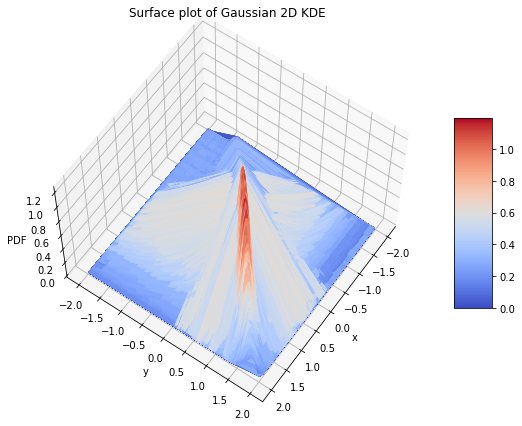

In [88]:
%matplotlib inline
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)